In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
df=pd.read_csv("BostonHousing.csv")

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.rename(columns={'medv':'price'},inplace=True)

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1] 

# LinearRegression

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model=LinearRegression()
mse=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)

-37.131807467698934


#### The model is near too zero. So the model is almost working perfectly.

# Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge=GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
ridge.fit(x,y)
print(ridge.best_params_)
print(ridge.best_score_)

{'alpha': 100}
-29.905701947540194


#### Here , we got score nearly to 0 which is more better than previously linearregression.

# Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso=GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
lasso.fit(x,y)
print(lasso.best_params_)
print(lasso.best_score_)


{'alpha': 1}
-35.531580220694856


#### Among above three models, ridge regerssion is best.

# Model Building

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
lasso_prediction=lasso.predict(X_test)
ridge_prediction=ridge.predict(X_test)

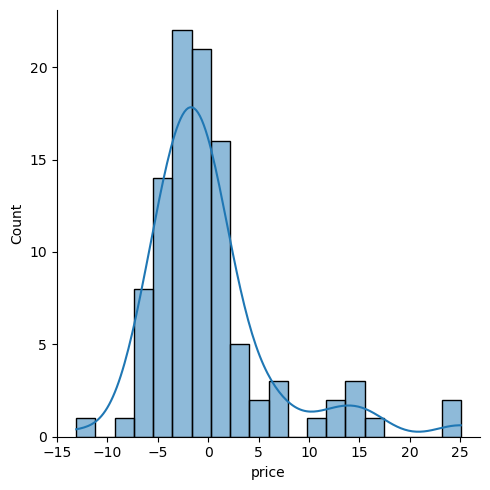

In [13]:
sns.displot(y_test-lasso_prediction,kde=True)

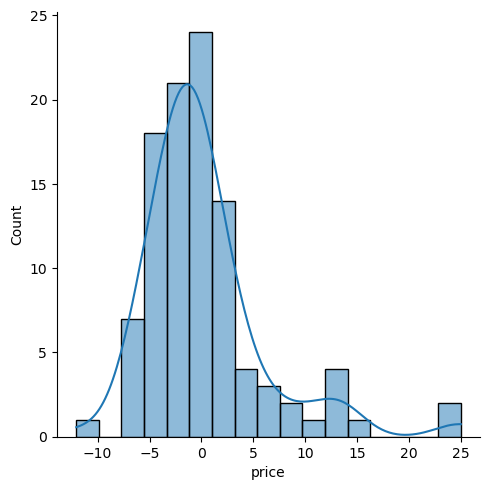

In [14]:
sns.displot(y_test-ridge_prediction,kde=True)

# Here , ridge regression is suitable to build the model.

# Multiple linear regression

In [16]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,4]

In [18]:
states=pd.get_dummies(data['State'],drop_first=True)

In [23]:
x=x.drop('State',axis=1)

In [25]:
x=pd.concat([states,x],axis=1)

In [26]:
print(x)

    Florida  New York  R&D Spend  Administration  Marketing Spend
0         0         1  165349.20       136897.80        471784.10
1         0         0  162597.70       151377.59        443898.53
2         1         0  153441.51       101145.55        407934.54
3         0         1  144372.41       118671.85        383199.62
4         1         0  142107.34        91391.77        366168.42
5         0         1  131876.90        99814.71        362861.36
6         0         0  134615.46       147198.87        127716.82
7         1         0  130298.13       145530.06        323876.68
8         0         1  120542.52       148718.95        311613.29
9         0         0  123334.88       108679.17        304981.62
10        1         0  101913.08       110594.11        229160.95
11        0         0  100671.96        91790.61        249744.55
12        1         0   93863.75       127320.38        249839.44
13        0         0   91992.39       135495.07        252664.93
14        

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
prediction=model.predict(X_test)

In [36]:
print(prediction)

[103015.20159797 132582.27760815 132447.73845175  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374688
 113969.43533013 167921.0656955 ]


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.934706847328238

#### The model score is nearly 1 . so the model is right.

In [38]:
prediction=model.predict([[0,1,165421.56,123456.45,123465.23]])
print(prediction)

[179781.56723602]


### The profit obtained from above input values is 179781.56723602.